In [2]:
import networkx as nx
import numpy as np
import random as rd
from scipy.sparse import csc_matrix
from IPython.display import Image
import itertools as it
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

## Exercise 1
Consider the network from the 2nd paper exercise 2 (generated by the next cell).



(ii) Print the different components (1pt)

(iii) Compute the clustering coefficient, diameter and density of the lcc-network (2pts)

(iv) Find the number of d=3 paths between nodes 2 and 3 (1pt)

(v) Print out all the d=3 pathes between nodes 2 and 3 (1pt)

(vi) identify the node pair with the highst number of d=3 pathes (1pt)

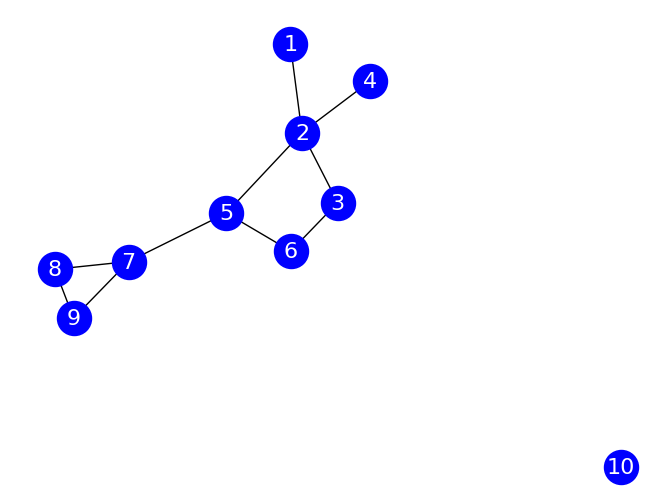

In [3]:
# a given graph:
G = nx.Graph()
G.add_nodes_from(range(1,11))
edge_list = [(1,2),(2,3),(2,4),(2,5),(3,6),(5,6),(5,7),(7,8),(7,9),(8,9)]
G.add_edges_from(edge_list)
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=600,
        font_color='white',
        font_size=16,
        )

## (i) Print the adjacency matrix and the edgelist of the network (1pt)

In [4]:
print(nx.adjacency_matrix(G).todense())

[[0 1 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 1 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [5]:
# that was the easiest way to go. alternatively,
adj = np.zeros((10, 10))

for i in range(1, G.number_of_nodes()):
  for j in range(1, G.number_of_nodes()):
    if ((i, j) in G.edges) == True:
      adj[i][j] = 1

adj = np.delete(adj, (0), axis=0)
adj = np.delete(adj,(0), axis=1)     
print('adjacent matrix :')
print(adj)  

adjacent matrix :
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0.]]


In [6]:
print('edge list :')
list(G.edges())

edge list :


[(1, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 6),
 (5, 6),
 (5, 7),
 (7, 8),
 (7, 9),
 (8, 9)]

## (ii) Print the different components

In [7]:
list(nx.connected_components(G))

[{1, 2, 3, 4, 5, 6, 7, 8, 9}, {10}]

## (iii) Compute the clustering coefficient, diameter and density of the lcc-network

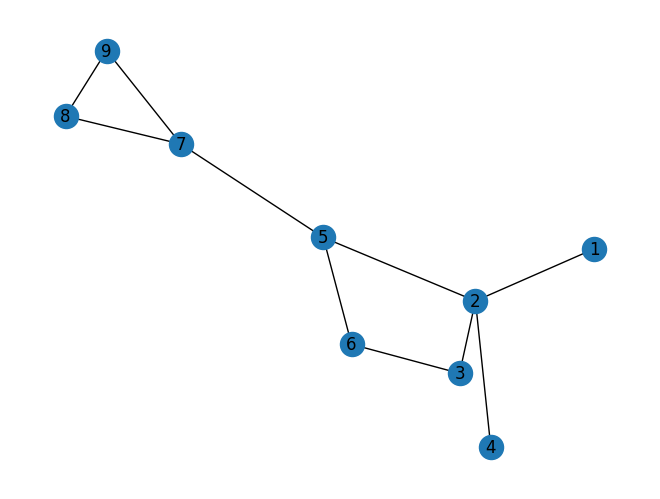

In [8]:
# get a lcc
lcc_nodes = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(lcc_nodes)
nx.draw(G_lcc, with_labels=True)

In [9]:
# the density of a graph is defined as the ratio of the number of edges to the one of nodes
density = len(G_lcc.edges())/len(G_lcc.nodes())
print(round(density,3))

1.111


In [10]:
# a diameter refers to a length of the longest shortest path, i.e., the largest distance between any pair of nodes
nx.diameter(G_lcc)

4

In [11]:
# clustering coefficient is a measure of closeness between a given node's neighbors
# to be specific, for a given node i, its clustering coefficient is defined as the fraction between the existing linkes among its k_i neighbors (e_i) and the maximal possible number of links.
# C_i = e_i / (k_i*(k_i-1)/2)
# e_i : the number of connected edges between i's neighbors
# k_i : the number of k's neighbors

def print_clustering_coefficients(G):
    coef_list = []
    for node in G.nodes():
        e = 0
        k = len(list(G.neighbors(node)))
        k_neighbor_combination = list(combinations(list(G.neighbors(node)),2))
        for i in k_neighbor_combination:
            if i in list(G.edges()):
                e+=1
        coef_list.append(round(e/(k*(k-1)/2),2))
    return coef_list

In [12]:
G_lcc.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9))

In [13]:
list(G_lcc.neighbors(7))

[5, 8, 9]

In [14]:
list(combinations(list(G_lcc.neighbors(7)),2))

[(5, 8), (5, 9), (8, 9)]

In [15]:
list(combinations(list(G_lcc.neighbors(7)),2))[0] in list(G_lcc.edges())

False

## (iv) Find the number of d=3 paths between nodes 2 and 3 (1pt)
## (v) Print out all the d=3 pathes between nodes 2 and 3 (1pt)

In [16]:
d3_paths = []
for i in list(nx.all_simple_paths(G, 2, 3)):
    if len(i)==3:
        d3_paths.append(i)
print(len(d3_paths))
print(d3_paths)

0
[]


## (vi) identify the node pair with the highst number of d=3 pathes (1pt)

In [17]:
def find_d3_path(G,start,end):
    d3_paths = []
    for i in list(nx.all_simple_paths(G, start, end)):
        if len(i)==3:
            d3_paths.append(i)
    return d3_paths

In [18]:
find_d3_path(G,2,3)

[]

In [19]:
# with the use of find_d3_path in tuple,
def find_highest_d3_pair(G):
    d3_path_length = []
    node_comb = list(combinations(G.nodes(),2))
    for pair in node_comb:
        d3_path_length.append(len(find_d3_path(G,pair[0],pair[1])))
    return node_comb[np.argmax(d3_path_length)]

In [20]:
find_highest_d3_pair(G)

(2, 6)